In [57]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.stats as stats

In [152]:
# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
## Boston housing data analysis
housing_columns=["crime","zone","industry","charles","no","rooms","age",
                   "distance","radial","tax","pupil","aam","lower","med_price"]
housing_features=housing_columns[:-1]
housing_target = housing_columns[-1]
housing_data=pd.read_csv("C:/Users/Madhumitha.Ganesan/Desktop/DataScience/DataScience/data/boston_housing.csv",names=housing_columns)

In [60]:
housing_data.describe()

,crime,zone,industry,charles,no,rooms,age,distance,radial,tax,pupil,aam,lower,med_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


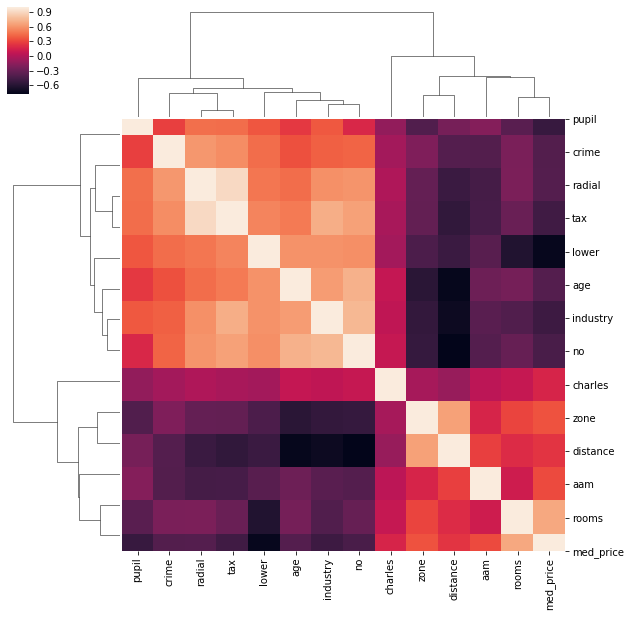

In [61]:
sns.clustermap(housing_data.corr())

In [62]:
print(housing_data.corr())

              crime      zone  industry   charles        no     rooms  \
crime      1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
zone      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
industry   0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
charles   -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
no         0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
rooms     -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
age        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
distance  -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
radial     0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
tax        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
pupil      0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
aam       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069   
lower      0.455621 -0.412995  0.603800 -0.053929  

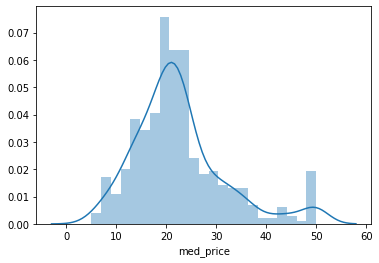

In [63]:
sns.distplot(housing_data[housing_target])

In [88]:
## Building a Linear Regression Model to predict the data 

X=StandardScaler().fit_transform(housing_data[housing_features]).astype(float)
y=housing_data[housing_target]

lr = LinearRegression()

mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=50,scoring='neg_mean_squared_error'))
root_mean_squared_error=list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE : ",np.mean(root_mean_squared_error))

50-fold mean RMSE :  4.444661510147179


In [65]:
coeffs=LinearRegression().fit(X,y).coef_
coeff_df=pd.DataFrame((list(zip(housing_features,np.abs(coeffs)))),columns=["columns","betas"])
coeff_df.sort_values("betas",ascending=False,inplace=True)
coeff_df

,columns,betas
12,lower,3.743627
7,distance,3.104044
5,rooms,2.674230
8,radial,2.662218
9,tax,2.076782
10,pupil,2.060607
4,no,2.056718
1,zone,1.081569
0,crime,0.928146
11,aam,0.849268


In [66]:
## We can observe that last few columns have no impact on the Linear Regression. We could build a better model by removing the columns that have lesser impact
## This can be done by PCA (Principal Component Analysis)

pca=PCA()
transformed_pca_x = pca.fit_transform(housing_data[housing_features])
component_names=["component_"+str(comp) for comp in range(1,len(pca.explained_variance_)+1)]

##generating a new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
print(housing_data[housing_features].head())
transformed_pca_x.head()

     crime  zone  industry  charles     no  rooms   age  distance  radial  \
0  0.00632  18.0      2.31        0  0.538  6.575  65.2    4.0900       1   
1  0.02731   0.0      7.07        0  0.469  6.421  78.9    4.9671       2   
2  0.02729   0.0      7.07        0  0.469  7.185  61.1    4.9671       2   
3  0.03237   0.0      2.18        0  0.458  6.998  45.8    6.0622       3   
4  0.06905   0.0      2.18        0  0.458  7.147  54.2    6.0622       3   

     tax  pupil     aam  lower  
0  296.0   15.3  396.90   4.98  
1  242.0   17.8  396.90   9.14  
2  242.0   17.8  392.83   4.03  
3  222.0   18.7  394.63   2.94  
4  222.0   18.7  396.90   5.33  


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13
0,-119.818843,-5.560056,-3.172693,5.291593,-1.818728,-6.312070,-1.032609,5.477971,-1.935498,-0.329154,0.378374,-0.071311,0.033545
1,-168.890155,10.116209,-30.781887,1.296776,0.369680,-3.241821,-0.628651,0.915626,0.467686,1.299810,0.048674,-0.094734,-0.033150
2,-169.311707,14.080532,-16.753628,-10.278399,-0.093409,-5.910068,1.718753,0.510026,0.414966,0.910646,-0.467469,-0.107257,-0.004509
3,-190.230642,18.302463,-6.534195,-19.644921,1.513442,-6.959925,-1.971382,0.845947,1.063487,0.964424,-0.276214,-0.052466,0.043716
4,-190.133451,16.097947,-13.158520,-14.178141,1.761005,-5.760987,-3.059650,1.032843,1.062885,1.123178,-0.538077,-0.055400,0.035538


In [67]:
## Generating component loadings on original features
component_matrix = pd.DataFrame(pca.components_,index=component_names,columns=housing_features)

## adding additional columns to describe some elements
component_matrix["explained_variance_ratio"]=pca.explained_variance_ratio_
component_matrix["eigen_value"]=pca.explained_variance_

In [72]:
figure=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [73]:
figure.add_subplot(131)

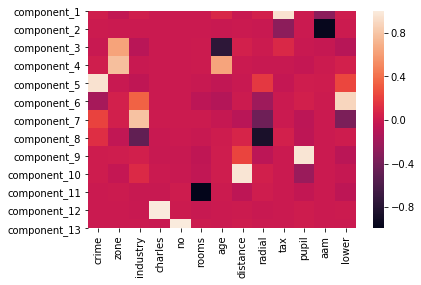

In [74]:
sns.heatmap(component_matrix.iloc[:,:-2])

c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Variance explained')

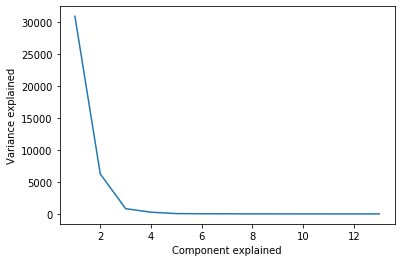

In [79]:
figure.add_subplot(132)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1),component_matrix.eigen_value)
sns.mpl.pyplot.xlabel("Component explained")
sns.mpl.pyplot.ylabel("Variance explained")

Text(0, 0.5, 'Eigen value')

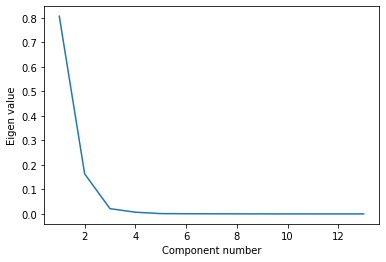

In [80]:
figure.add_subplot(133)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1),component_matrix.explained_variance_ratio)
sns.mpl.pyplot.xlabel("Component number")
sns.mpl.pyplot.ylabel("Eigen value")

In [82]:
### Getting the cumulative sum of the eigen values
component_matrix.explained_variance_ratio.cumsum()

## The variance is explained well with the first 3 ~ 4 components itself

component_1     0.805823
component_2     0.968875
component_3     0.990224
component_4     0.997181
component_5     0.998481
component_6     0.999208
component_7     0.999627
component_8     0.999875
component_9     0.999961
component_10    0.999992
component_11    0.999998
component_12    1.000000
component_13    1.000000
Name: explained_variance_ratio, dtype: float64

In [109]:
### Now we can try to predict the model using the first 3 columns alone and see how the RMSE values comes to 

X_new=StandardScaler().fit_transform(housing_data[housing_features[:3]]).astype(float)
y_new=housing_data[housing_target]

lr_new=LinearRegression()

mean_sqrd_err = np.abs(cross_val_score(lr_new,X_new,y_new,cv=50,scoring='neg_mean_squared_error'))
rmse=list(map(np.sqrt,mean_sqrd_err))
print("50-fold mean RMSE : ",np.mean(rmse))   ## RMSE is worse for this dataset

## Predict the model with PCA enabled coeffiients 
mean_sqrd_err_pca=np.abs(cross_val_score(lr,transformed_pca_x.iloc[:,:2],y,cv=50,scoring='neg_mean_squared_error'))
rmse_pca=list(map(np.sqrt,mean_sqrd_err_pca))
print("50 cross fold RMSE for PCA tranformed data :",np.mean(rmse_pca))  ## Worse than using normal Linear Regression

50-fold mean RMSE :  6.839995038659005
50 cross fold RMSE for PCA tranformed data : 7.073179867853216


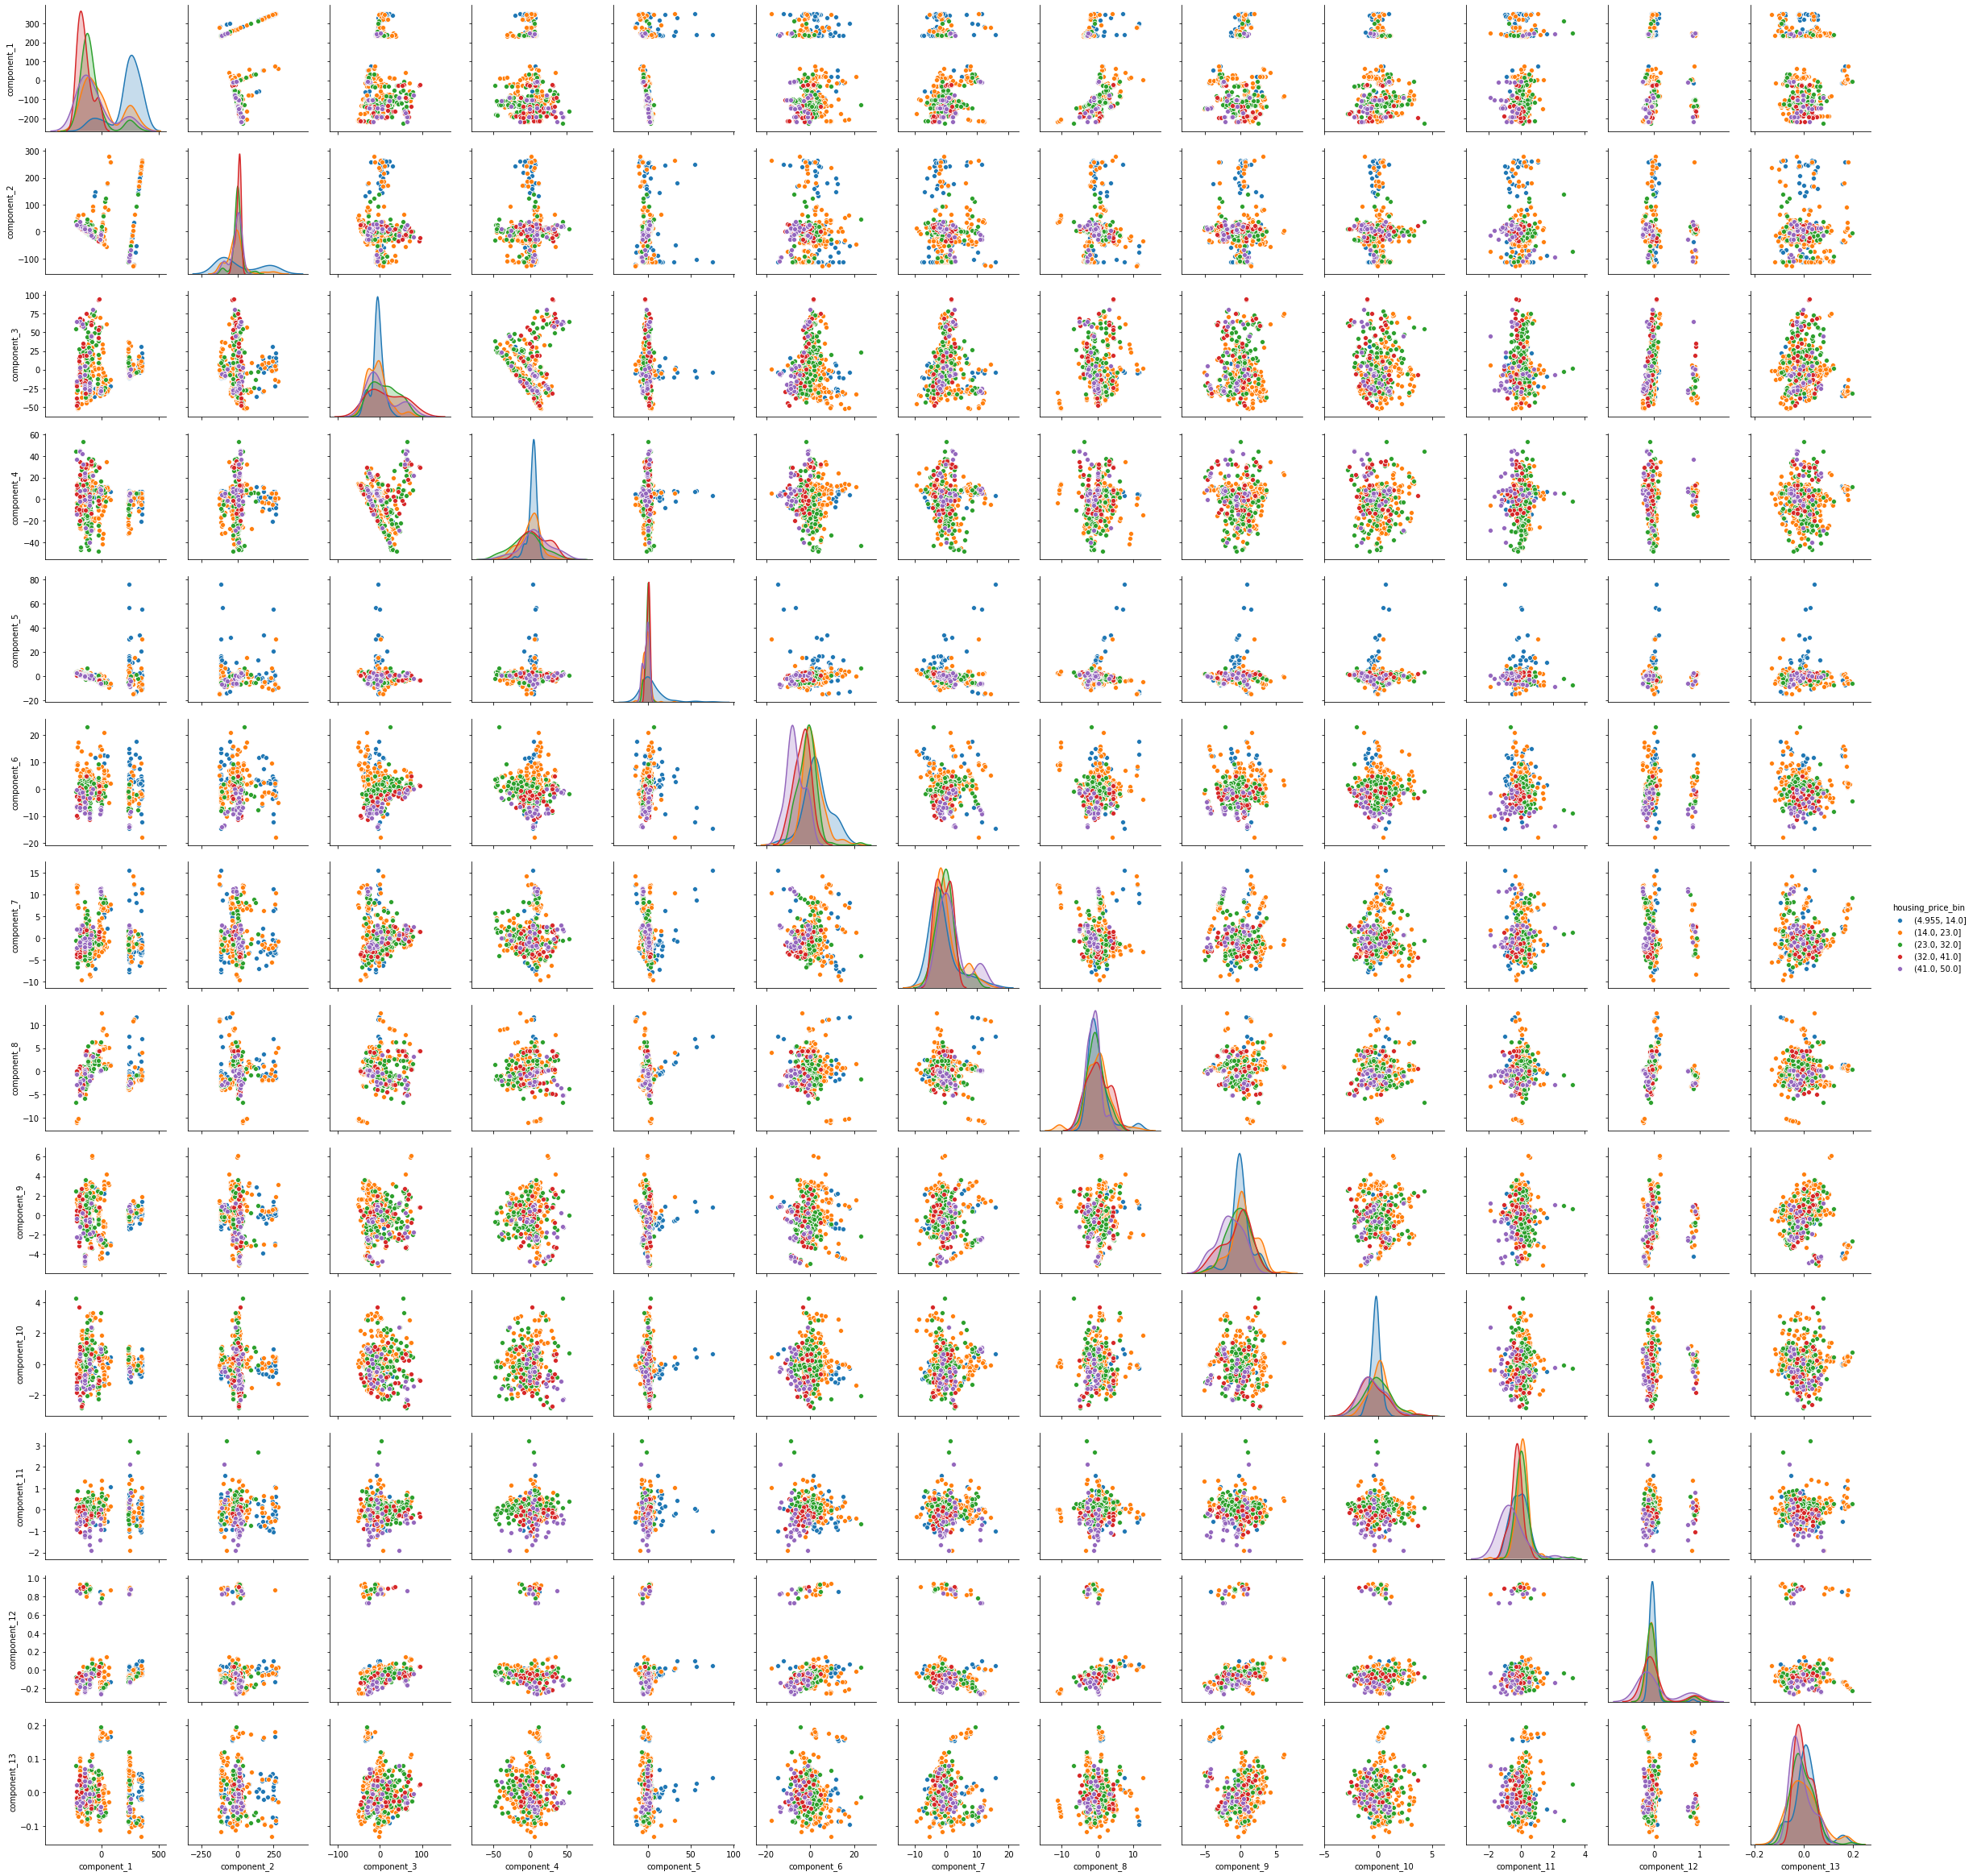

In [111]:
transformed_pca_x["housing_price_bin"]=pd.cut(housing_data[housing_target],5)
sns.pairplot(transformed_pca_x,hue="housing_price_bin")

# EXERCISE - PCA ON IRIS DATA SET  -- TO DO

iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",
                        names=["sepal_length","sepal_width","petal_length","petal_width","iris_type"])

le = LabelEncoder()
iris_data.iris_type = le.fit_transform(iris_data.iris_type)
iris_data.head()

In [132]:
iris_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",names=["sepal_length","sepal_width","petal_length","petal_width","iris_type"])

le = LabelEncoder()
iris_data.iris_type = le.fit_transform(iris_data.iris_type)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [141]:
features=["sepal_length","sepal_width","petal_length","petal_width"]
X_iris=iris_data[features]
y_iris=iris_data.iris_type

In [ ]:
log=LogisticRegression(C=1e9,solver='lbfgs')
#log.fit(X_iris,y_iris)

mean_sqrd_err_iris = np.abs(cross_val_score(log,X_iris,y_iris,cv=50,scoring='neg_mean_squared_error'))
rmse_iris=list(map(np.sqrt,mean_sqrd_err_iris))
print("50-fold mean RMSE : ",np.mean(rmse_iris))   ## RMSE is worse for this dataset

In [147]:
## We can observe that last few columns have no impact on the Linear Regression. We could build a better model by removing the columns that have lesser impact
## This can be done by PCA (Principal Component Analysis)

i_pca=PCA()
transformed_pca_iris = i_pca.fit_transform(iris_data[features])
i_comp_names=["component_"+str(comp) for comp in range(1,len(i_pca.explained_variance_)+1)]

##generating a new component dataframe
transformed_pca_iris = pd.DataFrame(transformed_pca_iris,columns=i_comp_names)
print(iris_data[features].head())
transformed_pca_iris.head()

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


,component_1,component_2,component_3,component_4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [151]:
## Generating component loadings on original features
component_matrix = pd.DataFrame(i_pca.components_,index=i_comp_names,columns=features)

## adding additional columns to describe some elements
component_matrix["explained_variance_ratio"]=i_pca.explained_variance_ratio_
component_matrix["eigen_value"]=i_pca.explained_variance_
component_matrix.explained_variance_ratio.cumsum()

component_1    0.924619
component_2    0.977685
component_3    0.994788
component_4    1.000000
Name: explained_variance_ratio, dtype: float64

In [ ]:
## Predict the model with PCA enabled coeffiients 
mean_sqrd_err_ipca=np.abs(cross_val_score(log,transformed_pca_iris.iloc[:,:2],y_iris,cv=50,scoring='neg_mean_squared_error'))
rmse_ipca=list(map(np.sqrt,mean_sqrd_err_ipca))
print("50 cross fold RMSE for PCA tranformed data :",np.mean(rmse_ipca))  ## Better with just 2 columns

In [117]:
## Generating Polynomial features upto degree 2 for the Boston data set
pf2=PolynomialFeatures(degree=2,interaction_only=True)
## Applying it to the data ignoring the first column
pf_2_data=pf2.fit_transform(housing_data[housing_features])[:,1:]
print(pf_2_data.shape)
lr3=LinearRegression()
absolute_errors=np.abs(cross_val_score(lr3,pf_2_data,y,cv=10))
rmses=list(map(np.sqrt,absolute_errors))
print("10-fold mean of RMSEs for degree 2 case are : ",np.mean(rmses))  ### Shows very good improvement in RMSE score

(506, 91)
10-fold mean of RMSEs for degree 2 case are :  0.9592713028887333


In [121]:
## Extending this to 3 degree polynomial 
pf3=PolynomialFeatures(degree=3,interaction_only=True)
pf_3_data=pf3.fit_transform(housing_data[housing_features])[:,1:]
print(pf_3_data.shape)
lr4=LinearRegression()
absolute_errors_3=np.abs(cross_val_score(lr4,pf_3_data,y,cv=10,scoring='neg_mean_squared_error'))
rmses3=list(map(np.sqrt,absolute_errors_3))
print("10-fold mean of RMSEs for degree 3 case are : ",np.mean(rmses3))  ### Horrible score due to overfit modelling

(506, 377)
10-fold mean of RMSEs for degree 3 case are :  5970162.913998071


In [116]:
## REGULARIZATION - Applied on Overly fit data to reduce the complications and maintain a good score
## Lasso / L1 Regularization
## Ridge / L2 Regularization

In [ ]:
## Apply Lasso regularization for Boston data set model

lasso=Lasso(max_iter=10000)
absolute_errors_3_lasso=np.abs(cross_val_score(lasso,pf_3_data,y,cv=10))
rmses_lasso=list(map(np.sqrt,absolute_errors_3_lasso))
print("10 fold RMSE for degree 3 case , strongest lasso regularization = ",np.mean(rmses_lasso))

In [126]:
lasso_all=Lasso(max_iter=10000).fit(pf_3_data,housing_data[housing_target])
print("Number of features in the model : ",len(lasso_all.coef_))
non_zero_features_mask = np.abs(lasso_all.coef_)>0.0001
print(non_zero_features_mask)
print("Number of non-zero features in the model:",np.sum(non_zero_features_mask.astype(int)))
print("Fraction of total features used :",float(np.sum(non_zero_features_mask.astype(int)))/len(lasso_all.coef_))

Number of features in the model :  377
[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
 False False False  True False False  True False  True False False  True
  True False  True False False  True False False False  True False  True
 False  True  True  True  True False False False False False False  True
 False False  True False  True False False False  True  True False  True
 False False False  True False False False False False  True False  True
 False False False False False  True False  True False  True False False
  True False  True  True  True False False False False  True False  True
 False  True False False False False  True False False False  True  True
 False False

c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352.7171104840104, tolerance: 4.271629541501978
  positive)


# Exercise Time!
####Try the lasso method but generating the 4th order polynomial features (use PolynomialFeatures(degree=4,interactions_only=True) and the same Lasso() and cross_val_score functions). Does our RMSE improve yet again?
####Try the lasso method for the poly3 case, but change the $\lambda$ (called $\alpha$ in sklearn) parameter to 0.2; What happens to the RMSE? What happens to the fraction of non-zero features in the model trained on all the data?

In [127]:
## Ridge Regression
ridge=Ridge()
ridge_cv_squared_errors  = np.abs(cross_val_score(ridge,pf_3_data,y,cv=10))
rmse_ridge_cv=list(map(np.sqrt,ridge_cv_squared_errors))
print("10-fold mean RMSE for degree 3 case, Ridge regularization : ",np.mean(rmse_ridge_cv))

c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.29042e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.40348e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.26441e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.66797e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\madhunitha-ganesan\appdata\local\programs\python\python37-32\li

10-fold mean RMSE for degree 3 case, Ridge regularization :  5.251524303051584
